### Preparing the data 

We import the required libraries, namely Pandas, Quandl and Plotly. Quandl is used to retrieve financial data, in this case, bitcoin currency price from various exchanges in different currencies and Plotly is used to obtain interactive graphs of the cryptocurrency price. Since most operation is on dataframes, we use Pandas for basic data manipulation.

In [1]:
import pandas as pd
import quandl
import plotly

Data can be retrieved from quandl only by using a unique authorization token which is associated with your account with them. Using the token, data of bitcoin trade in different currencies from various exchanges is obtained. The time period is set as between 15th Nov, 2017 and 28th February, 2019.

In [2]:
bitcoin_inr_localbtc=quandl.get("BCHARTS/LOCALBTCINR", authtoken="QSJzpvzed84zHo7GCttx", 
                                start_date="2017-11-15", end_date="2018-02-28")

In [3]:
bitcoin_usd_kraken=quandl.get("BCHARTS/KRAKENUSD", authtoken="QSJzpvzed84zHo7GCttx", 
                              start_date="2017-11-15", end_date="2018-02-28")

In [4]:
bitcoin_eur_coinbase=quandl.get("BCHARTS/COINBASEEUR", authtoken="QSJzpvzed84zHo7GCttx", 
                                           start_date="2017-11-15", end_date="2018-02-28")

In [5]:
bitcoin_gbp_coinsbank=quandl.get("BCHARTS/COINSBANKGBP", authtoken="QSJzpvzed84zHo7GCttx" , 
                        start_date="2017-11-15", end_date="2018-02-28")

In [6]:
bitcoin_rub_wex=quandl.get("BCHARTS/WEXRUB", authtoken="QSJzpvzed84zHo7GCttx"
                           , start_date="2017-11-15", end_date="2018-02-28")

In [7]:
bitcoin_cad_kraken=quandl.get("BCHARTS/KRAKENCAD", authtoken="QSJzpvzed84zHo7GCttx" ,
                             start_date="2017-11-15", end_date="2018-02-28")

In [8]:
bitcoin_aud_localbtc=quandl.get("BCHARTS/LOCALBTCAUD", authtoken="QSJzpvzed84zHo7GCttx" , 
                        start_date="2017-11-15", end_date="2018-02-28")

In [9]:
bitcoin_chf_localbtc=quandl.get("BCHARTS/LOCALBTCCHF", authtoken="QSJzpvzed84zHo7GCttx" , 
                        start_date="2017-11-15", end_date="2018-02-28")

In [10]:
bitcoin_jpy_coincheck=quandl.get("BCHARTS/COINCHECKJPY", authtoken="QSJzpvzed84zHo7GCttx" , 
                        start_date="2017-11-15", end_date="2018-02-28")

In [11]:
bitcoin_jpy_coincheck.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2017-11-15,761800.0,830000.0,759861.0,827058.0,72437.564204,5.799843e+10,800667.855673
2017-11-16,826989.0,902104.0,806200.0,888095.0,90928.293149,7.744439e+10,851708.349220
2017-11-17,888095.0,914200.0,845205.0,867363.0,96516.527711,8.548579e+10,885711.428830
2017-11-18,867338.0,884499.0,826000.0,876994.0,75266.009758,6.477105e+10,860561.776644
2017-11-19,876959.0,903000.0,865800.0,897143.0,36974.722938,3.259442e+10,881532.515257


Managing missing data:

In [12]:
bitcoin_cad_kraken.loc['2018-01-12']=bitcoin_cad_kraken.loc['2018-01-11']

A new column 'serial' is added in each of the dataframes, to enable merging with the currency exchange data.

In [16]:
bitcoin_usd_kraken['serial']=range(1, len(bitcoin_usd_kraken) + 1)

bitcoin_eur_coinbase['serial']=range(1, len(bitcoin_eur_coinbase) + 1)

bitcoin_gbp_coinsbank['serial']=range(1, len(bitcoin_gbp_coinsbank) + 1)

bitcoin_rub_wex['serial']=range(1, len(bitcoin_rub_wex) + 1)

bitcoin_cad_kraken['serial']=range(1, len(bitcoin_cad_kraken) + 1)

bitcoin_aud_localbtc['serial']=range(1, len(bitcoin_aud_localbtc) + 1)

bitcoin_chf_localbtc['serial']=range(1, len(bitcoin_chf_localbtc) + 1)

bitcoin_jpy_coincheck['serial']=range(1, len(bitcoin_jpy_coincheck) + 1)

In [17]:
bitcoin_usd_kraken.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,serial
Date,,,,,,,,
2017-11-15,6660.6,7300.0,6660.6,7260.0,7650.858383,5.417746e+07,7081.226281,1
2017-11-16,7260.0,7790.0,7085.2,7750.7,8575.163873,6.375057e+07,7434.327022,2
2017-11-17,7755.7,7950.0,7520.2,7695.7,5630.447920,4.388672e+07,7794.534086,3
2017-11-18,7691.9,7849.9,7426.9,7786.0,2972.039159,2.276482e+07,7659.664424,4
2017-11-19,7790.5,8000.0,7670.0,8000.0,2708.774322,2.125915e+07,7848.255061,5


Setting the directory: 

In [18]:
cd C:\Users\Dell\Downloads

C:\Users\Dell\Downloads


In [19]:
bitcoin_cad_kraken.tail(60)

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,serial
Date,,,,,,,,
2017-12-31,16163.2,18000.0,15700.1,17476.0,18.914433,3.223886e+05,17044.582397,47
2018-01-01,17350.0,17903.0,16500.0,17601.2,78.453991,1.348173e+06,17184.253826,48
2018-01-02,17601.2,18700.0,16731.1,18700.0,83.169276,1.480318e+06,17798.855895,49
2018-01-03,18699.9,19490.0,18200.0,18900.0,95.868893,1.803671e+06,18813.938712,50
2018-01-04,18980.0,19267.9,18000.0,18799.1,93.668555,1.729487e+06,18463.906652,51
2018-01-05,18748.2,19995.0,17501.5,19995.0,63.288634,1.195499e+06,18889.627971,52
2018-01-06,19951.0,20490.0,19600.0,19710.1,28.093986,5.613775e+05,19982.124284,53
2018-01-07,19753.7,20398.0,18002.0,18204.0,40.703355,7.869233e+05,19333.130539,54
2018-01-08,18230.1,20000.0,17500.0,18379.2,73.141507,1.331939e+06,18210.439569,55


In order to convert the non-INR currencies into INR, currency exchange data is read in, and a column called serial is added.

Euro to INR: 

In [20]:
inr_eur=pd.read_csv("EUR-INR.csv")

inr_eur['serial']=range(1, len(inr_eur) + 1)

inr_eur.head()

,Date_,EUR-INR,serial
0,15/11/2017,76.824000,1
1,16/11/2017,76.818000,2
2,17/11/2017,76.605000,3
3,18/11/2017,75.671500,4
4,19/11/2017,76.141354,5


USD to INR:

In [21]:
inr_usd=pd.read_csv("USD-INR.csv")

inr_usd['serial']=range(1, len(inr_usd) + 1)

inr_usd.head()

,Date_,USD-INR,serial
0,15/11/2017,65.2926,1
1,16/11/2017,65.2100,2
2,17/11/2017,65.0080,3
3,18/11/2017,65.0080,4
4,19/11/2017,64.9050,5


GBP to INR:

In [22]:
inr_gbp=pd.read_csv("GBP-INR.csv")

inr_gbp['serial']=range(1, len(inr_gbp) + 1)

inr_gbp.head()

,Date_,GBP-INR,serial
0,15/11/2017,86.002,1
1,16/11/2017,86.063,2
2,17/11/2017,85.921,3
3,18/11/2017,85.892,4
4,19/11/2017,85.749,5


JPY to INR:

In [23]:
inr_jpy=pd.read_csv("JPY-INR.csv")

inr_jpy['serial']=range(1, len(inr_jpy) + 1)

inr_jpy.head()

,Date_,JPY-INR,serial
0,15/11/2017,0.578754,1
1,16/11/2017,0.576874,2
2,17/11/2017,0.579871,3
3,18/11/2017,0.579871,4
4,19/11/2017,0.579147,5


AUD to INR:

In [24]:
inr_aud=pd.read_csv("AUD-INR.csv")

inr_aud['serial']=range(1, len(inr_aud) + 1)

inr_aud.head()

,Date_,AUD-INR,serial
0,15/11/2017,49.566224,1
1,16/11/2017,49.471566,2
2,17/11/2017,49.172051,3
3,18/11/2017,49.172051,4
4,19/11/2017,49.003275,5


CHF to INR:

In [25]:
inr_chf=pd.read_csv("CHF-INR.csv")

inr_chf['serial']=range(1, len(inr_chf) + 1)

inr_chf.head()

,Date_,CHF-INR,serial
0,15/11/2017,66.030406,1
1,16/11/2017,65.627344,2
2,17/11/2017,65.729589,3
3,18/11/2017,65.729589,4
4,19/11/2017,65.567031,5


CAD to INR:

In [26]:
inr_cad=pd.read_csv("CAD-INR.csv")

inr_cad['serial']=range(1, len(inr_cad) + 1)

inr_cad.head()

,Date_,CAD-INR,serial
0,15/11/2017,51.05700,1
1,16/11/2017,51.12400,2
2,17/11/2017,50.86700,3
3,18/11/2017,50.24700,4
4,19/11/2017,51.09862,5


RUB to INR:

In [27]:
inr_rub=pd.read_csv("RUB-INR.csv")

inr_rub['serial']=range(1, len(inr_rub) + 1)

inr_rub.head()

,Date_,RUB-INR,serial
0,15/11/2017,1.084510,1
1,16/11/2017,1.092267,2
2,17/11/2017,1.099935,3
3,18/11/2017,1.099935,4
4,19/11/2017,1.098242,5


Bitcoin price data and currency exchange data is merged on the column 'serial'. Another column is added to the dataframe which gives the bitcoin price in INR, and then three columns, namely Serial, Date and Price in INR are extracted in a new dataframe. In the new table, 'serial' is set as the index.

Bitcoin trade in USD:

In [28]:
bitcoin_usd_kraken_1=pd.merge(bitcoin_usd_kraken, inr_usd, on='serial')

bitcoin_usd_kraken_1['Price(INR)']= bitcoin_usd_kraken_1['Weighted Price']*bitcoin_usd_kraken_1['USD-INR'] 

bitcoin_usd_kraken_2=bitcoin_usd_kraken_1.iloc[:,[7,8,10]] 

bitcoin_usd_kraken_2.set_index('serial', inplace=True)

bitcoin_usd_kraken_2.head()

,Date_,Price(INR)
serial,,
1,15/11/2017,462351.675078
2,16/11/2017,484792.465136
3,17/11/2017,506707.071836
4,18/11/2017,497939.464853
5,19/11/2017,509390.994721


Bitcoin trade in EUR:

In [29]:
bitcoin_eur_coinbase_1=pd.merge(bitcoin_eur_coinbase, inr_eur, on='serial')

bitcoin_eur_coinbase_1['Price(INR)']= bitcoin_eur_coinbase_1['Weighted Price']*bitcoin_eur_coinbase_1['EUR-INR'] 

bitcoin_eur_coinbase_2=bitcoin_eur_coinbase_1.iloc[:,[7,8,10]] 

bitcoin_eur_coinbase_2.set_index('serial', inplace=True)

bitcoin_eur_coinbase_2.head()

,Date_,Price(INR)
serial,,
1,15/11/2017,467198.662761
2,16/11/2017,499323.034771
3,17/11/2017,510253.217561
4,18/11/2017,498561.756436
5,19/11/2017,511442.574004


Bitcoin trade in GBP:

In [30]:
bitcoin_gbp_coinsbank_1=pd.merge(bitcoin_gbp_coinsbank, inr_gbp, on='serial')

bitcoin_gbp_coinsbank_1['Price(INR)']= bitcoin_gbp_coinsbank_1['Weighted Price']*bitcoin_gbp_coinsbank_1['GBP-INR'] 

bitcoin_gbp_coinsbank_2=bitcoin_gbp_coinsbank_1.iloc[:,[7,8,10]] 

bitcoin_gbp_coinsbank_2.set_index('serial', inplace=True)

bitcoin_gbp_coinsbank_2.head()

,Date_,Price(INR)
serial,,
1,15/11/2017,470003.731887
2,16/11/2017,486879.629742
3,17/11/2017,508861.339811
4,18/11/2017,500590.686698
5,19/11/2017,508105.333453


Bitcoin trade in JPY:

In [31]:
bitcoin_jpy_coincheck_1=pd.merge(bitcoin_jpy_coincheck, inr_jpy, on='serial')

bitcoin_jpy_coincheck_1['Price(INR)']= bitcoin_jpy_coincheck_1['Weighted Price']*bitcoin_jpy_coincheck_1['JPY-INR'] 

bitcoin_jpy_coincheck_2=bitcoin_jpy_coincheck_1.iloc[:,[7,8,10]] 

bitcoin_jpy_coincheck_2.set_index('serial', inplace=True)

bitcoin_jpy_coincheck_2.head()

,Date_,Price(INR)
serial,,
1,15/11/2017,463389.408679
2,16/11/2017,491328.184211
3,17/11/2017,513598.690803
4,18/11/2017,499015.127787
5,19/11/2017,510537.189296


Bitcoin trade in AUD:

In [32]:
bitcoin_aud_localbtc_1=pd.merge(bitcoin_aud_localbtc, inr_aud, on='serial')

bitcoin_aud_localbtc_1['Price(INR)']= bitcoin_aud_localbtc_1['Weighted Price']*bitcoin_aud_localbtc_1['AUD-INR'] 

bitcoin_aud_localbtc_2=bitcoin_aud_localbtc_1.iloc[:,[7,8,10]] 

bitcoin_aud_localbtc_2.set_index('serial', inplace=True)

bitcoin_aud_localbtc_2.head()

,Date_,Price(INR)
serial,,
1,15/11/2017,475387.377710
2,16/11/2017,510405.407832
3,17/11/2017,540125.672398
4,18/11/2017,520117.268277
5,19/11/2017,519761.437402


Bitcoin trade in CHF:

In [33]:
bitcoin_chf_localbtc_1=pd.merge(bitcoin_chf_localbtc, inr_chf, on='serial')

bitcoin_chf_localbtc_1['Price(INR)']= bitcoin_chf_localbtc_1['Weighted Price']*bitcoin_chf_localbtc_1['CHF-INR'] 

bitcoin_chf_localbtc_2=bitcoin_chf_localbtc_1.iloc[:,[7,8,10]] 

bitcoin_chf_localbtc_2.set_index('serial', inplace=True)

bitcoin_chf_localbtc_2.head()

,Date_,Price(INR)
serial,,
1,15/11/2017,506619.684400
2,16/11/2017,493067.743709
3,17/11/2017,513697.531142
4,18/11/2017,431969.171936
5,19/11/2017,522566.129490


Bitcoin trade in CAD:

In [34]:
bitcoin_cad_kraken_1=pd.merge(bitcoin_cad_kraken, inr_cad, on='serial')

bitcoin_cad_kraken_1['Price(INR)']= bitcoin_cad_kraken_1['Weighted Price']*bitcoin_cad_kraken_1['CAD-INR'] 

bitcoin_cad_kraken_2=bitcoin_cad_kraken_1.iloc[:,[7,8,10]] 

bitcoin_cad_kraken_2.set_index('serial', inplace=True)

bitcoin_cad_kraken_2.head()

,Date_,Price(INR)
serial,,
1,15/11/2017,461685.604298
2,16/11/2017,491064.772654
3,17/11/2017,504967.035286
4,18/11/2017,497435.133107
5,19/11/2017,516629.128389


Bitcoin trade in RUB:

In [35]:
bitcoin_rub_wex_1=pd.merge(bitcoin_rub_wex, inr_rub, on='serial')

bitcoin_rub_wex_1['Price(INR)']= bitcoin_rub_wex_1['Weighted Price']*bitcoin_rub_wex_1['RUB-INR'] 

bitcoin_rub_wex_2=bitcoin_rub_wex_1.iloc[:,[7,8,10]] 

bitcoin_rub_wex_2.set_index('serial', inplace=True)

bitcoin_rub_wex_2.head()

,Date_,Price(INR)
serial,,
1,15/11/2017,452760.173276
2,16/11/2017,480347.204594
3,17/11/2017,498803.101681
4,18/11/2017,494538.091798
5,19/11/2017,496439.387093


Data manipulation for the bitcoin data in INR: Serial column is added, the column indicating the price is renamed, appropriate index is set and the relevant columns are extracted.  

In [36]:
bitcoin_inr_localbtc['serial']=range(1, len(bitcoin_inr_localbtc) + 1)

bitcoin_inr_localbtc.rename(columns={'Weighted Price':'Price(INR)'}, inplace=True)

bitcoin_inr_localbtc=bitcoin_inr_localbtc.iloc[:,[6,7]] 

bitcoin_inr_localbtc['Date_'] = bitcoin_inr_localbtc.index

bitcoin_inr_localbtc.head()

,Price(INR),serial,Date_
Date,,,
2017-11-15,484602.599529,1,2017-11-15
2017-11-16,499929.336280,2,2017-11-16
2017-11-17,513324.320674,3,2017-11-17
2017-11-18,518103.145863,4,2017-11-18
2017-11-19,527314.757866,5,2017-11-19


In [37]:
bitcoin_inr_localbtc_1=bitcoin_inr_localbtc.set_index('serial')

bitcoin_inr_localbtc_1.head()

,Price(INR),Date_
serial,,
1,484602.599529,2017-11-15
2,499929.336280,2017-11-16
3,513324.320674,2017-11-17
4,518103.145863,2017-11-18
5,527314.757866,2017-11-19


In [38]:
bitcoin_inr_localbtc_1.to_csv('bitcoin_inr_localbtc_1.csv')

In [39]:
bitcoin_inr_localbtc_2=pd.read_csv("bitcoin_inr_localbtc_2.csv")
bitcoin_inr_localbtc_2=bitcoin_inr_localbtc_2.set_index('serial')
bitcoin_inr_localbtc_2.head()

,Price(INR),Date_
serial,,
1,484602.5995,15/11/2017
2,499929.3363,16/11/2017
3,513324.3207,17/11/2017
4,518103.1459,18/11/2017
5,527314.7579,19/11/2017


##### Variable Name reference 

Given is list of all the variable names used in reference:

1. bitcoin_inr_localbtc : Price index for bitcoins traded in INR at the exchange 'LocalBTC'

2. bitcoin_usd_kraken : Price index for bitcoins traded in USD at the exchange 'Kraken'

3. bitcoin_eur_coinbase : Price index for bitcoins traded in EUR at the exchange 'Coinbase'

4. bitcoin_gbp_coinsbank : Price index for bitcoins traded in GBP at the exchange 'Coinsbank'

5. bitcoin_jpy_coincheck : Price index for bitcoins traded in JPY at the exchange 'coincheck'

6. bitcoin_aud_localbtc : Price index for bitcoins traded in AUD at the exchange 'LocalBTC'

7. bitcoin_chf_localbtc : Price index for bitcoins traded in CHF at the exchange 'LocalBTC'

8. bitcoin_cad_kraken : Price index for bitcoins traded in CAD at the exchange 'Kraken'

9. bitcoin_rub_wex : Price index for bitcoins traded in RUB at the exchange 'wex'

10. inr_eur : Currency exchange data between INR and EUR

11. inr_usd : Currency exchange data between INR and USD

12. inr_gbp : Currency exchange data between INR and GBP

13. inr_jpy : Currency exchange data between INR and JPY

14. inr_aud : Currency exchange data between INR and AUD

15. inr_chf : Currency exchange data between INR and CHF

16. inr_cad : Currency exchange data between INR and CAD

17. inr_rub : Currency exchange data between INR and RUB

18. bitcoin_usd_kraken_1 : A merged dataframe of 'bitcoin_usd_kraken' and 'inr_usd'

19. bitcoin_usd_kraken_2 : A subset of 'bitcoin_usd_kraken_1', with just columns: serial, date and price

20. bitcoin_eur_coinbase_1 : A merged dataframe of 'bitcoin_eur_coinbase' and 'inr_eur'

21. bitcoin_eur_coinbase_2 : A subset of 'bitcoin_eur_coinbase_1', with just columns: serial, date and price

22. bitcoin_gbp_coinsbank_1 : A merged dataframe of 'bitcoin_gbp_coinsbank' and 'inr_gbp'

23. bitcoin_gbp_coinsbank_2 : A subset of 'bitcoin_gbp_coinsbank_1', with just columns: serial, date and price

24. bitcoin_jpy_coincheck_1 : A merged dataframe of 'bitcoin_jpy_coincheck' and 'inr_jpy'

25. bitcoin_jpy_coincheck_2 : A subset of 'bitcoin_jpy_coincheck_1', with just columns: serial, date and price

26. bitcoin_aud_localbtc_1 : A merged dataframe of 'bitcoin_aud_localbtc' and 'inr_aud'

27. bitcoin_aud_localbtc_2 : A subset of 'bitcoin_aud_localbtc_1', with just columns: serial, date and price

28. bitcoin_chf_localbtc_1 : A merged dataframe of 'bitcoin_chf_localbtc' and 'inr_chf'

29. bitcoin_chf_localbtc_2 : A subset of 'bitcoin_chf_localbtc_1', with just columns: serial, date and price

30. bitcoin_cad_kraken_1 : A merged dataframe of 'bitcoin_cad_kraken' and 'inr_cad'

31. bbitcoin_cad_kraken_2 : A subset of 'bitcoin_cad_kraken_1', with just columns: serial, date and price

32. bitcoin_rub_wex_1 : A merged dataframe of 'bitcoin_rub_wex' and 'inr_rub'

33. bitcoin_rub_wex_2 : A subset of 'bitcoin_rub_wex_1', with just columns: serial, date and price

34. bitcoin_inr_localbtc_1 : A version of 'bitcoin_inr_localbtc' with serial as index

35. bitcoin_inr_localbtc_2 : Correct date format version of 'bitcoin_inr_localbtc_1'

36. bitcoin_data : A master dataframe; compilation of all final exchange dataframes; used the generate the correlation matrix

# Plotting

In [40]:
plotly.tools.set_credentials_file(username='Devanshi', api_key='1a7VAfB8ovyuue1c2ujf')

In [41]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [42]:
import plotly.plotly as ply
import plotly.graph_objs as go


# Create and style traces
trace0 = go.Scatter(
    x=bitcoin_usd_kraken_2['Date_'], y=bitcoin_usd_kraken_2['Price(INR)'],
    name = 'USD',
    line = dict(
        color = ('rgb(31, 119, 180)'),
        width = 2)
)
trace1 = go.Scatter(
    x=bitcoin_eur_coinbase_2['Date_'], y=bitcoin_eur_coinbase_2['Price(INR)'],
    name = 'EUR',
    line = dict(
        color = ('rgb(255, 127, 14)'),
        width = 2,)
)
trace2 = go.Scatter(
    x=bitcoin_gbp_coinsbank_2['Date_'], y=bitcoin_gbp_coinsbank_2['Price(INR)'],
    name = 'GBP',
    line = dict(
        color = ('rgb(44, 160, 44)'),
        width = 2) # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x=bitcoin_inr_localbtc_2['Date_'], y=bitcoin_inr_localbtc_2['Price(INR)'],
    name = 'INR',
    line = dict(
        color = ('rgb(214, 39, 40)'),
        width = 2)
)

trace4 = go.Scatter(
    x=bitcoin_jpy_coincheck_2['Date_'], y=bitcoin_jpy_coincheck_2['Price(INR)'],
    name = 'JPY',
    line = dict(
        color = ('rgb(148, 103, 189)'),
        width = 2)
)

trace5 = go.Scatter(
    x=bitcoin_aud_localbtc_2['Date_'], y=bitcoin_aud_localbtc_2['Price(INR)'],
    name = 'AUD',
    line = dict(
        color = ('rgb(140, 86, 75)'),
        width = 2)
)

trace6 = go.Scatter(
    x=bitcoin_cad_kraken_2['Date_'], y=bitcoin_cad_kraken_2['Price(INR)'],
    name = 'CAD',
    line = dict(
        color = ('rgb(227, 119, 194)'),
        width = 2)
)

trace7 = go.Scatter(
    x=bitcoin_chf_localbtc_2['Date_'], y=bitcoin_chf_localbtc_2['Price(INR)'],
    name = 'CHF',
    line = dict(
        color = ('rgb(127, 127, 127)'),
        width = 2)
)

trace8 = go.Scatter(
    x=bitcoin_rub_wex_2['Date_'], y=bitcoin_rub_wex_2['Price(INR)'],
    name = 'RUB',
    line = dict(
        color = ('rgb(188, 189, 34)'),
        width = 2)
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7,trace8]

# Edit the layout
layout = dict(title = 'Bitcoin prices across currencies',
              xaxis = dict(title = '15 Nov 2017 - 28 Feb 2018'),
              yaxis = dict(title = 'Price (INR)'),
              )

fig = dict(data=data, layout=layout)
ply.iplot(fig, filename='styled-line')

C:\Users\Dell\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Renaming the price in all dataframes as the currency they were converted from: 

In [43]:
bitcoin_inr_localbtc_2.rename(columns={'Price(INR)':'INR'}, inplace=True)
bitcoin_usd_kraken_2.rename(columns={'Price(INR)':'USD'}, inplace=True)
bitcoin_eur_coinbase_2.rename(columns={'Price(INR)':'EUR'}, inplace=True)
bitcoin_gbp_coinsbank_2.rename(columns={'Price(INR)':'GBP'}, inplace=True)
bitcoin_jpy_coincheck_2.rename(columns={'Price(INR)':'JPY'}, inplace=True)
bitcoin_aud_localbtc_2.rename(columns={'Price(INR)':'AUD'}, inplace=True)
bitcoin_chf_localbtc_2.rename(columns={'Price(INR)':'CHF'}, inplace=True)
bitcoin_cad_kraken_2.rename(columns={'Price(INR)':'CAD'}, inplace=True)
bitcoin_rub_wex_2.rename(columns={'Price(INR)':'RUB'}, inplace=True)

In [44]:
bitcoin_inr_localbtc_2.head()

,INR,Date_
serial,,
1,484602.5995,15/11/2017
2,499929.3363,16/11/2017
3,513324.3207,17/11/2017
4,518103.1459,18/11/2017
5,527314.7579,19/11/2017


In [45]:
bitcoin_data= pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge
(pd.merge(bitcoin_inr_localbtc_2,bitcoin_usd_kraken_2,on='serial'),
 bitcoin_eur_coinbase_2,on='serial'),bitcoin_gbp_coinsbank_2,on='serial'),
bitcoin_jpy_coincheck_2,on='serial'),bitcoin_aud_localbtc_2,on='serial'),
bitcoin_chf_localbtc_2,on='serial'),bitcoin_cad_kraken_2,on='serial'),bitcoin_rub_wex_2,on='serial')

In [46]:
bitcoin_data.head()

,INR,Date__x,Date__y,USD,Date__x,EUR,Date__y,GBP,Date__x,JPY,Date__y,AUD,Date__x,CHF,Date__y,CAD,Date_,RUB
serial,,,,,,,,,,,,,,,,,,
1,484602.5995,15/11/2017,15/11/2017,462351.675078,15/11/2017,467198.662761,15/11/2017,470003.731887,15/11/2017,463389.408679,15/11/2017,475387.377710,15/11/2017,506619.684400,15/11/2017,461685.604298,15/11/2017,452760.173276
2,499929.3363,16/11/2017,16/11/2017,484792.465136,16/11/2017,499323.034771,16/11/2017,486879.629742,16/11/2017,491328.184211,16/11/2017,510405.407832,16/11/2017,493067.743709,16/11/2017,491064.772654,16/11/2017,480347.204594
3,513324.3207,17/11/2017,17/11/2017,506707.071836,17/11/2017,510253.217561,17/11/2017,508861.339811,17/11/2017,513598.690803,17/11/2017,540125.672398,17/11/2017,513697.531142,17/11/2017,504967.035286,17/11/2017,498803.101681
4,518103.1459,18/11/2017,18/11/2017,497939.464853,18/11/2017,498561.756436,18/11/2017,500590.686698,18/11/2017,499015.127787,18/11/2017,520117.268277,18/11/2017,431969.171936,18/11/2017,497435.133107,18/11/2017,494538.091798
5,527314.7579,19/11/2017,19/11/2017,509390.994721,19/11/2017,511442.574004,19/11/2017,508105.333453,19/11/2017,510537.189296,19/11/2017,519761.437402,19/11/2017,522566.129490,19/11/2017,516629.128389,19/11/2017,496439.387093


In [47]:
bitcoin_data.head()

,INR,Date__x,Date__y,USD,Date__x,EUR,Date__y,GBP,Date__x,JPY,Date__y,AUD,Date__x,CHF,Date__y,CAD,Date_,RUB
serial,,,,,,,,,,,,,,,,,,
1,484602.5995,15/11/2017,15/11/2017,462351.675078,15/11/2017,467198.662761,15/11/2017,470003.731887,15/11/2017,463389.408679,15/11/2017,475387.377710,15/11/2017,506619.684400,15/11/2017,461685.604298,15/11/2017,452760.173276
2,499929.3363,16/11/2017,16/11/2017,484792.465136,16/11/2017,499323.034771,16/11/2017,486879.629742,16/11/2017,491328.184211,16/11/2017,510405.407832,16/11/2017,493067.743709,16/11/2017,491064.772654,16/11/2017,480347.204594
3,513324.3207,17/11/2017,17/11/2017,506707.071836,17/11/2017,510253.217561,17/11/2017,508861.339811,17/11/2017,513598.690803,17/11/2017,540125.672398,17/11/2017,513697.531142,17/11/2017,504967.035286,17/11/2017,498803.101681
4,518103.1459,18/11/2017,18/11/2017,497939.464853,18/11/2017,498561.756436,18/11/2017,500590.686698,18/11/2017,499015.127787,18/11/2017,520117.268277,18/11/2017,431969.171936,18/11/2017,497435.133107,18/11/2017,494538.091798
5,527314.7579,19/11/2017,19/11/2017,509390.994721,19/11/2017,511442.574004,19/11/2017,508105.333453,19/11/2017,510537.189296,19/11/2017,519761.437402,19/11/2017,522566.129490,19/11/2017,516629.128389,19/11/2017,496439.387093


In [48]:
bitcoin_data=bitcoin_data.iloc[:,[0,1,3,5,7,9,11,13,15,17]] 

bitcoin_data.rename(columns={'Date__x':'Date'}, inplace=True)

bitcoin_data.set_index('Date', inplace=True)

bitcoin_data.head()

,INR,USD,EUR,GBP,JPY,AUD,CHF,CAD,RUB
Date,,,,,,,,,
15/11/2017,484602.5995,462351.675078,467198.662761,470003.731887,463389.408679,475387.377710,506619.684400,461685.604298,452760.173276
16/11/2017,499929.3363,484792.465136,499323.034771,486879.629742,491328.184211,510405.407832,493067.743709,491064.772654,480347.204594
17/11/2017,513324.3207,506707.071836,510253.217561,508861.339811,513598.690803,540125.672398,513697.531142,504967.035286,498803.101681
18/11/2017,518103.1459,497939.464853,498561.756436,500590.686698,499015.127787,520117.268277,431969.171936,497435.133107,494538.091798
19/11/2017,527314.7579,509390.994721,511442.574004,508105.333453,510537.189296,519761.437402,522566.129490,516629.128389,496439.387093


## Plot 

In [49]:
matrix=bitcoin_data.corr(method='pearson')
matrix

,INR,USD,EUR,GBP,JPY,AUD,CHF,CAD,RUB
INR,1.000000,0.981390,0.983976,0.980833,0.979893,0.981725,0.911368,0.979937,0.973940
USD,0.981390,1.000000,0.996835,0.998838,0.988882,0.983161,0.922088,0.991020,0.989532
EUR,0.983976,0.996835,1.000000,0.994433,0.988905,0.983321,0.915020,0.993204,0.987211
GBP,0.980833,0.998838,0.994433,1.000000,0.989100,0.983083,0.922590,0.989018,0.988591
JPY,0.979893,0.988882,0.988905,0.989100,1.000000,0.990774,0.916547,0.984164,0.987447
AUD,0.981725,0.983161,0.983321,0.983083,0.990774,1.000000,0.927166,0.981570,0.990636
CHF,0.911368,0.922088,0.915020,0.922590,0.916547,0.927166,1.000000,0.914551,0.934412
CAD,0.979937,0.991020,0.993204,0.989018,0.984164,0.981570,0.914551,1.000000,0.984869
RUB,0.973940,0.989532,0.987211,0.988591,0.987447,0.990636,0.934412,0.984869,1.000000


In [50]:
import seaborn as sns

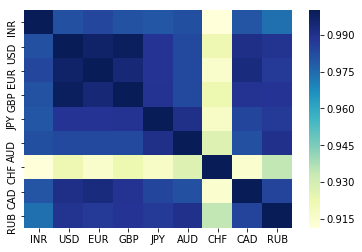

In [51]:
sns.heatmap(matrix, cmap='YlGnBu')